<a href="https://colab.research.google.com/github/Mustufa-kerawala/Time-series-Telstra.ltd-18-9/blob/master/Week2(3_Regress).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing dependencies to create algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

#Mounting to drive maybe an important step fuck knows
from google.colab import drive


#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor


#Modelling Metrics
from sklearn import metrics


  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=a1042896da86d9eaa8680e8c20abfdd34b7d6093bfe7628f6e16c60e7f2ce918
  Stored in directory: /tmp/pip-ephem-wheel-cache-73ioa4dj/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [0]:
#Another mounting step irrelevant tbh
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/"


In [0]:
#Retrieving the dataset from yahoo finance and turning it into a csv
df_full = pdr.get_data_yahoo("TLS.AX", start="2018-01-01").reset_index()

df_full.to_csv('TLS.AX.csv',index=False)


[*********************100%***********************]  1 of 1 downloaded


In [0]:
#Tells us the number of observations and columns aka shape 
df_full.shape

In [0]:
df_full.head()


In [0]:
#This command gives us summary stats of all the data in each column
df_full.describe()


In [0]:
df_full["Adj Close"].plot()


In [0]:
#Setting the date as an index to pre-process the data 
df_full.set_index("Date", inplace=True)


In [0]:
#Brief screenshot of the data 
df_full.head()


In [0]:
window_size = 32
num_samples = len(df_full)-window_size

#Making the data into an array
indices = np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)

data = df_full['Adj Close'].values[indices]#making a 2D matrix

x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [0]:
#Splitting the data for cross validation ie to train alg
split_fraction=0.8
ind_split=int(split_fraction*num_samples)


In [0]:
#Training the algorithm
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [0]:
#shows the shape of the data 
y_test.shape

(80,)

# Baseline to compare 

In [0]:
#Creating a model by defining a function
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
def get_plot (model_pred):
  
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

In [0]:
y_pred_lag=np.roll(y_test,1)


In [0]:
get_performance(y_pred_lag)


Mean Absolute Error: 0.0368
Mean Squared Error: 0.0021
Root Mean Squared Error: 0.0453


In [0]:
get_plot(y_pred_lag)


# Linear Regression


In [0]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)
             

In [0]:
y_pred_lr=model_lr.predict(x_test)


In [0]:
get_performance(y_pred_lr)


Mean Absolute Error: 0.0416
Mean Squared Error: 0.0025
Root Mean Squared Error: 0.0501


In [0]:
get_plot(y_pred_lr)


In [0]:
#Predicted Slope coefficients of Telstra
model_lr.coef_


In [0]:
#Intercept
model_lr.intercept_


# Ridge Regression


In [0]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [0]:
get_performance(y_pred_ridge)


In [0]:
get_plot(y_pred_ridge)


Lasso Regression

In [0]:
model_lasso = Lasso()
model_lasso.fit(x_train, y_train)


In [0]:
y_pred_lasso = model_lasso.predict(x_test)


In [0]:
get_performance(y_pred_lasso)



Mean Absolute Error: 0.7565
Mean Squared Error: 0.5857
Root Mean Squared Error: 0.7653


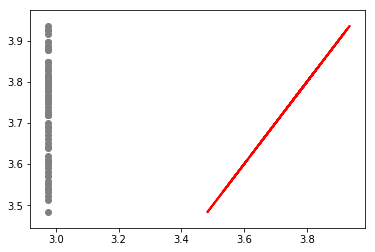

In [0]:
get_plot(y_pred_lasso)